In [31]:
#Manuel Aragon
#EUID:ma1162

In [32]:
#1. PCA on digits for visualization

import numpy as np
import pylab as py

%matplotlib inline

In [33]:
#digit recognition setup...

from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target
print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print ("classes: %r" % list(np.unique(y)))

n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_samples=1797
n_features=64


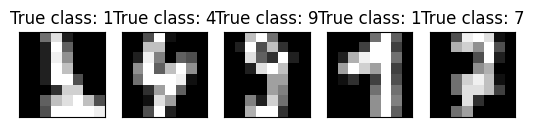

In [34]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        py.subplot(1, data.shape[0], (i + 1))
        py.imshow(data[i].reshape(shape), interpolation=interpolation)
        py.title(labels[i])
        py.xticks(()), py.yticks(())
        py.gray()
        
subsample = np.random.permutation(X.shape[0])[:5]
images = X[subsample]
labels = ['True class: %d' % l for l in y[subsample]]
plot_gallery(images, labels, shape=(8,8))

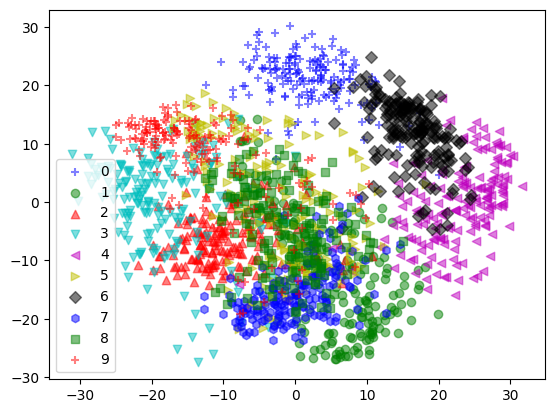

In [35]:
#1. PCA on digits for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
x_pca = pca.fit_transform(X)

x_pca.shape

from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    py.scatter(x_pca[y == i, 0], x_pca[y == i, 1],
       c=c, marker=m, label=i, alpha=0.5)

_ = py.legend(loc='best')
                     
                                       

In [36]:
from sklearn.decomposition import PCA
import numpy as np


# Fit PCA with the desired number of components
pca = PCA(n_components=64)
pca.fit(X)

# Print the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
for i, evr in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {evr * 100:.2f}%")

# Calculate the cumulative explained variance for the first two components
first_two_explained_variance = np.sum(explained_variance_ratio[:2]) * 100
print(f"\nThe cumulative explained variance for the first two components: {first_two_explained_variance:.2f}%")


Component 1: 14.89%
Component 2: 13.62%
Component 3: 11.79%
Component 4: 8.41%
Component 5: 5.78%
Component 6: 4.92%
Component 7: 4.32%
Component 8: 3.66%
Component 9: 3.35%
Component 10: 3.08%
Component 11: 2.37%
Component 12: 2.27%
Component 13: 1.82%
Component 14: 1.77%
Component 15: 1.47%
Component 16: 1.41%
Component 17: 1.32%
Component 18: 1.25%
Component 19: 1.02%
Component 20: 0.91%
Component 21: 0.89%
Component 22: 0.80%
Component 23: 0.77%
Component 24: 0.72%
Component 25: 0.70%
Component 26: 0.60%
Component 27: 0.58%
Component 28: 0.52%
Component 29: 0.49%
Component 30: 0.43%
Component 31: 0.37%
Component 32: 0.35%
Component 33: 0.34%
Component 34: 0.33%
Component 35: 0.31%
Component 36: 0.29%
Component 37: 0.26%
Component 38: 0.23%
Component 39: 0.22%
Component 40: 0.21%
Component 41: 0.19%
Component 42: 0.16%
Component 43: 0.15%
Component 44: 0.14%
Component 45: 0.12%
Component 46: 0.11%
Component 47: 0.10%
Component 48: 0.08%
Component 49: 0.06%
Component 50: 0.04%
Compon

In [37]:
import pandas as pd

data = []
for n_components in range(1, 65):
    pca = PCA(n_components=n_components)
    pca.fit(X)

    compression = 1 - (n_components / 64)
    explained_variance = np.sum(pca.explained_variance_ratio_)

    data.append([n_components, compression * 100, explained_variance * 100])

# Create a Pandas DataFrame and display the table
columns = ['Number of PCA Components', 'Percent Compression', 'Percent Variance Explained']
df = pd.DataFrame(data, columns=columns)
pd.set_option('display.max_rows', None)
display(df)


,Number of PCA Components,Percent Compression,Percent Variance Explained
0,1,98.4375,14.890594
1,2,96.8750,28.509365
2,3,95.3125,40.303959
3,4,93.7500,48.713938
4,5,92.1875,54.496353
5,6,90.6250,59.413263
6,7,89.0625,63.729230
7,8,87.5000,67.390539
8,9,85.9375,70.743699
9,10,84.3750,73.822549


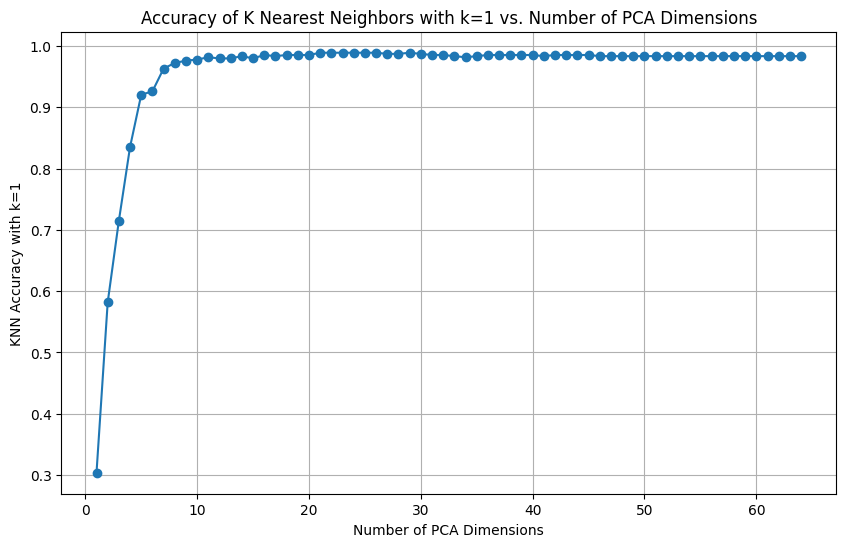

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Prepare a list to store the accuracy scores for each number of PCA dimensions
accuracy_scores = []

# Iterate over the desired range of PCA dimensions (e.g., 1 to 64)
for n_components in range(1, 65):
    # Apply PCA on the training set
    pca = PCA(n_components=n_components)
    pca.fit(X_train)

    # Transform both the training and the testing sets
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a K nearest neighbors classifier with k=1 on the transformed training set
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, y_train)

    # Evaluate the classifier's accuracy on the transformed testing set
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score
    accuracy_scores.append(accuracy)

# Plot the accuracy scores against the number of PCA dimensions
plt.figure(figsize=(10, 6))
plt.plot(range(1, 65), accuracy_scores, marker='o')
plt.xlabel("Number of PCA Dimensions")
plt.ylabel("KNN Accuracy with k=1")
plt.title("Accuracy of K Nearest Neighbors with k=1 vs. Number of PCA Dimensions")
plt.grid()
plt.show()
